In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\yilun\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  # Remove the CWD from sys.path while we load stuff.


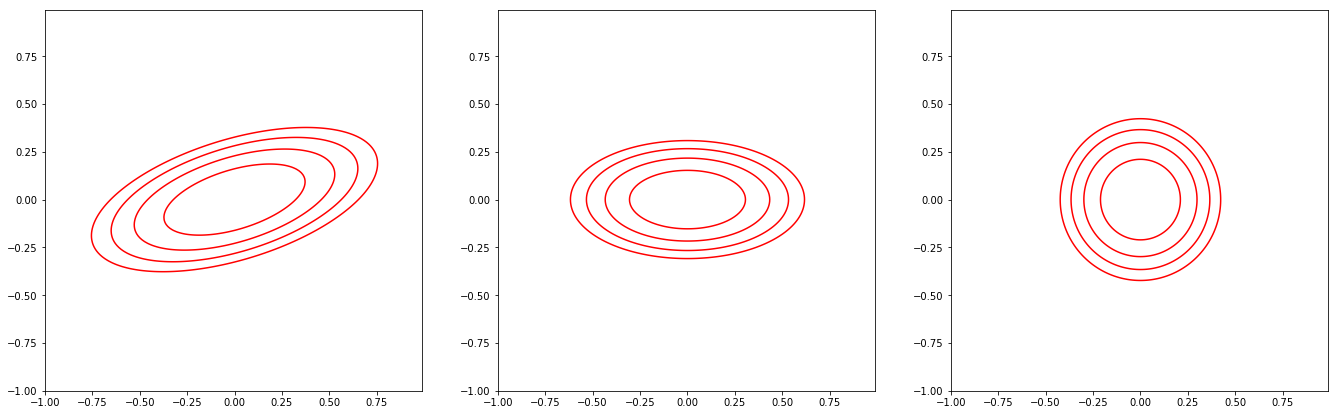

In [37]:
__name__ == '__main__'
# Fig 2.8 
#Contours of constant probability density for a Gaussian distribution in two dimensions 
from matplotlib.mlab import bivariate_normal
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]
k=[[2,1,1],[2,1,0],[2,2,0]]
plt.figure(figsize=(23, 7))
for i in range(3):
    plt.subplot(1,3,i+1)
    z = bivariate_normal(x, y, sigmax=k[i][0], sigmay=k[i][1], sigmaxy=k[i][2])
    plt.contour(x, y, z, colors="r", levels=np.linspace(0.1*z.min() + 0.9*z.max(), z.max(), 5))
plt.show()


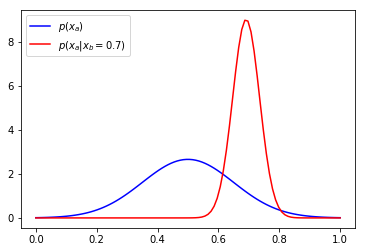

In [3]:
#Fig 2.9 
# marginal distribution p(xa) (blue curve) and the conditional distribution p(xa|xb) for xb = 0.7 (red curve)
from scipy.stats import norm
x=np.linspace(0,1,100)
u_a = 0.5
u_b = 0.5
sig_aa = 0.15
sig_bb = 0.15
sig_ab = 0.0215
p = norm.pdf(x, loc=u_a, scale = sig_aa)
plt.plot(x, p, color='b',label="$p(x_a)$")
p_con= norm.pdf(x, loc = u_a + sig_ab / sig_bb ** 2 * (0.7 - u_b), 
                scale = np.sqrt(sig_aa ** 2 - sig_ab ** 2 / sig_bb ** 2))

plt.plot(x, p_con,color='r',label="$p(x_a|x_b=0.7)$")
plt.legend()
plt.show()

C:\Users\yilun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  after removing the cwd from sys.path.


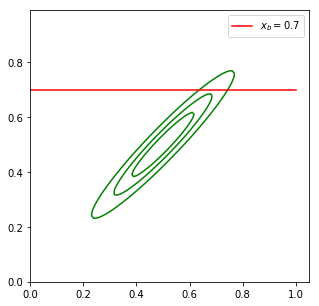

In [4]:
# contours of a Gaussian distribution p(xa, xb) over two variables
x, y = np.mgrid[0:1:0.01, 0:1:0.01]
plt.figure(figsize=(5, 5))
z = bivariate_normal(x, y, mux=u_a,muy=u_b, sigmax=sig_aa, sigmay=sig_bb, sigmaxy=sig_ab)

plt.contour(x, y, z, colors="green",levels=np.linspace(0.2*z.max(), z.max(), 4))

plt.plot([0, 1], [0.7, 0.7], color='r',label='$x_b=0.7$')
plt.legend()
plt.show()


C:\Users\yilun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


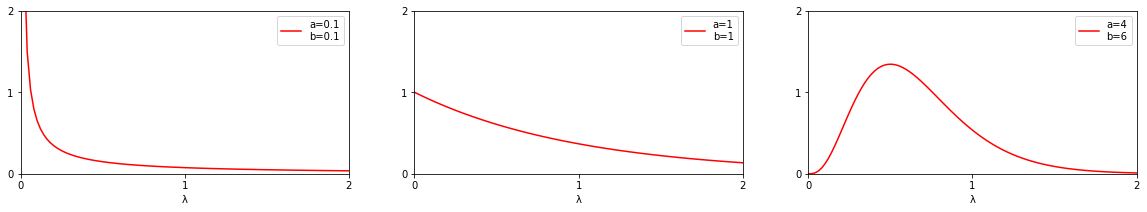

In [5]:
#Figure 2.13 
#Plot of the gamma distribution Gam(λ|a, b)
from scipy.special import gamma
def Gam(lam,a,b):
    return (1/gamma(a))*b**a*lam**(a-1)*np.exp(-b*lam)
x = np.linspace(0, 2, 100)
plt.figure(figsize=(20,3 ))
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [4, 6]]):
    plt.subplot(1, 3, i + 1) 
    beta = Gam(x,a,b)
    plt.xlim(0, 2)
    plt.xticks([0,1,2])
    plt.xlabel('λ')
    plt.ylim(0,2)
    plt.yticks([0,1,2])
    plt.plot(x, beta,color='red',label='a=%s\nb=%s' % (a,b))
    plt.legend()
plt.show()

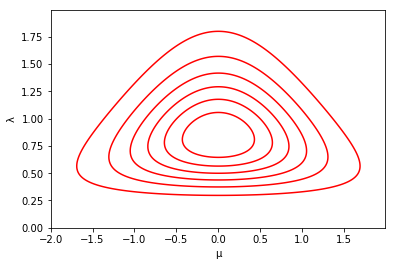

In [6]:
#Figure 2.14
#Contour plot of the normal-gamma distribution
from scipy.special import gamma
def Gam(lam,a,b):
    return (1/gamma(a))*b**a*lam**(a-1)*np.exp(-b*lam)
def p(u,u0,lam,beta,a,b):
    return (beta*lam/2/np.pi) ** 1/2 * np.exp(- beta*lam/2 * (u-u0)**2)*Gam(lam,a,b)
u0=0
beta=2
a=5
b=6
u,lam= np.mgrid[-2:2:0.01, 0:2:0.01]
z=p(u,u0,lam,beta,a,b)
plt.contour(u, lam, z, colors="r")
plt.xlabel('μ')
plt.ylabel('λ')
plt.show()

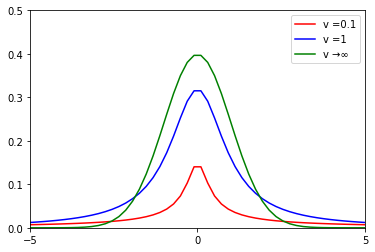

In [7]:
#Figure 2.15
#Plot of Student’s t-distribution 
from scipy.special import gamma
def St(x,u,lam,v):
    return gamma(v/2+1/2)/gamma(v/2)*(lam/np.pi/v)**(0.5)*(1+(lam*(x-u)**2)/v)**(-v/2-1/2)
x=np.linspace(-5,5)
u=0
lam=1
v=[0.1,1,300]
colormap=['r','b','g']
k=['=0.1','=1','→∞']
plt.xlim(-5, 5)
plt.xticks([-5,0,5])
plt.ylim(0, 0.5)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
for n,i in enumerate(v):
    plt.plot(x,St(x,u,lam,i),color=colormap[n],label='v %s' % k[n])
    plt.legend()
plt.show()

C:\Users\yilun\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


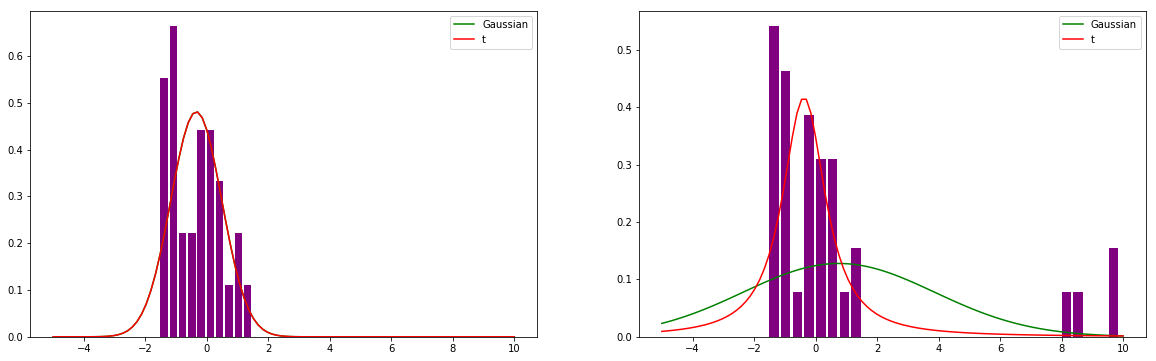

In [8]:
#Figure 2.16 
#Illustration of the robustness of Student’s t-distribution compared to a Gaussian
from scipy.stats import t, norm, uniform
plt.figure(figsize=(20,6))
tt = norm.rvs(size=30)
x = np.linspace(-5, 10, 100)
plt.subplot(1, 2, 1)
plt.hist(tt, normed=True, rwidth=0.8, color="purple",bins=10)
u0,sig0= norm.fit(tt)
plt.plot(x, norm.pdf(x, loc=u0, scale=sig0), color='g')
d,u,sig = t.fit(tt)
plt.plot(x, t.pdf(x, df=d, loc=u, scale=sig), color='r')
plt.legend(["Gaussian",'t'])

plt.subplot(1, 2, 2)
tt1 = np.hstack([tt, uniform.rvs(size=4, loc=8, scale=2)])
plt.hist(tt1, normed=True, rwidth=0.8, color="purple",bins=30)
u0,sig0 = norm.fit(tt1)
plt.plot(x, norm.pdf(x, loc=u0, scale=sig0), color='g')
d,u,sig = t.fit(tt1)
plt.plot(x, t.pdf(x, df=d, loc=u, scale=sig), color='r')
plt.legend(["Gaussian",'t'])

plt.show()

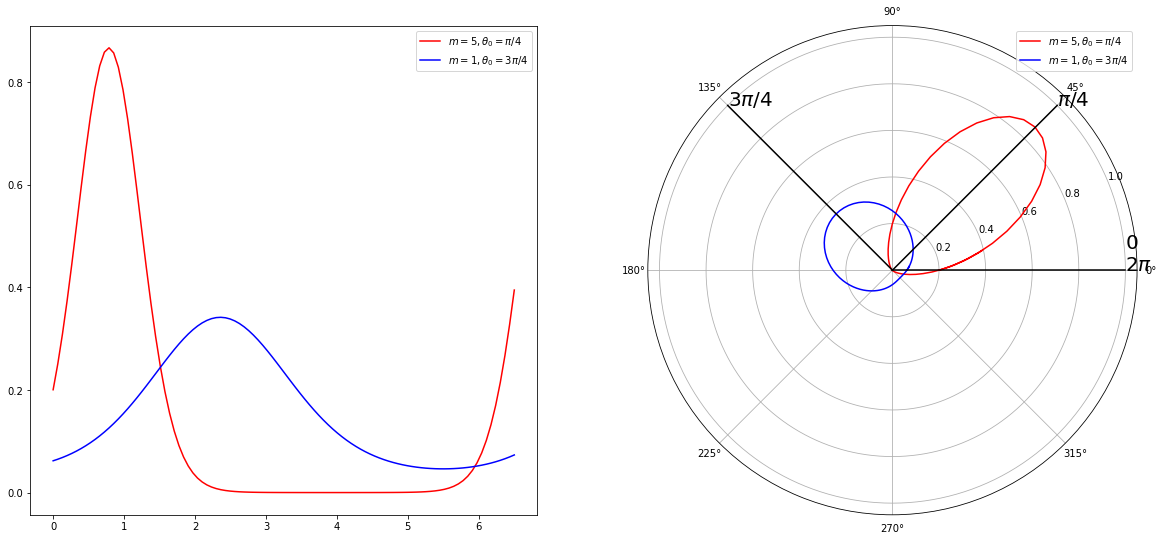

In [9]:
#Figure 2.19
# The von Mises distribution plotted for two different parameter values, shown as a Cartesian plot
# on the left and as the corresponding polar plot on the right.
from scipy.stats import vonmises
plt.figure(figsize=(20,9))
x=np.linspace(0,6.5,100)
plt.subplot(1,2,1)
plt.plot(x,vonmises.pdf(x,5,loc=np.pi/4),color='red',
         label=r'$m=5,\theta_0=\pi/4$')
plt.plot(x,vonmises.pdf(x,1,loc=3*np.pi/4),color='blue',
         label=r'$m=1,\theta_0=3\pi/4$')
plt.legend()
plt.subplot(1,2,2,projection='polar')
plt.plot(x,vonmises.pdf(x,5,loc=np.pi/4),color='red',
         label=r'$m=5,\theta_0=\pi/4$')
plt.plot(x,vonmises.pdf(x,1,loc=3*np.pi/4),color='blue',
         label=r'$m=1,\theta_0=3\pi/4$')
plt.plot([0, np.pi/4], [0, 1],color='black')
plt.plot([0, 3*np.pi/4], [0, 1],color='black')
plt.plot([0, 0], [0, 1],color='black')
plt.text(np.pi/4,1,'$\pi/4$',fontsize=20)
plt.text(np.pi/4*3,1,'$3\pi/4$',fontsize=20)
plt.text(0,1,'0\n$2\pi$',fontsize=20)
plt.legend()
plt.show()

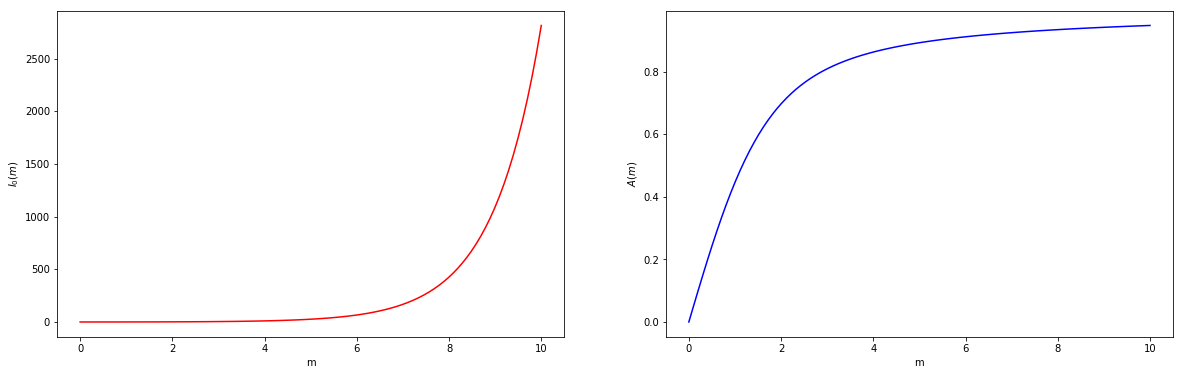

In [12]:
# Figure 2.20 
#Plot of the Bessel function I0(m) together with the function A(m)
from scipy.special import i0,i1
x=np.linspace(0,10,100)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(x,i0(x),color='red')
plt.xlabel('m')
plt.ylabel('$I_0(m)$')

plt.subplot(1,2,2)
plt.plot(x,i1(x)/i0(x),color='blue')
plt.xlabel('m')
plt.ylabel('$A(m)$')
plt.show()

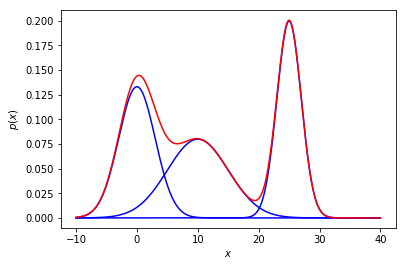

In [33]:
# Figure 2.22 
#Example of a Gaussian mixture distribution in one dimension showing three Gaussiansin blue and
# their sum in red.
x=np.linspace(-10,40,1000)
plt.plot(x, norm.pdf(x, loc=0, scale=3), color='b')
plt.plot(x, norm.pdf(x, loc=10, scale=5), color='b')
plt.plot(x, norm.pdf(x, loc=25, scale=2), color='b')
plt.plot(x, norm.pdf(x, loc=0, scale=3)+norm.pdf(x, loc=10, scale=5)+norm.pdf(x, loc=25, scale=2),color='red')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.show()
